 ## **[코드 내용]**

### 1. 자연어 처리 (NLP)
####   1.1. 한국어 형태소분석기 konlpy와 mecab설치
####   1.2. Mecab 사용자 사전 추가하기
####   1.3. 한국어 자연어 처리 수행
 
 
 ### 2. 핵심어 분석  
 #### 2.1. 핵심어 단순빈도 분석
 #### 2.2. 단어 구름
 #### 2.3. 단어빈도-역문서빈도(TF-IDF) 분석
    

# 1. 자연어 처리 (NLP)


## 1.1. 형태소 분석기 mecab 설치하기(window 버전)

### 1) Visual Studio 설치

https://visualstudio.microsoft.com/ko/vs/older-downloads/ 

재배포 가능 패키지 및 필드 도구 > Microsoft Build Tools 2015 업데이트를 다운로드


### 2) KoNLPy 설치하기 

1. 아나콘다 프롬포트를 실행한 후 activate py37 입력하여 가상환경 py37로 들어갑니다.  



2. 아나콘다 프롬포트에 아래 명령어를 수행하여서 pip 설치, 32비트, 64비트 확인 합니다.  
    **pip install --upgrade pip --user**  



3. jpype1 설치진행 (관리자 권한으로 실행, 아나콘다 아이콘 오른쪽으로 누른후 '관리자 권한'으로 실행) 아래 명령어 수행합니다.  
    **conda install –c conda-forge jpype1**  



4. JDK 설치 https://www.oracle.com/java/technologies/javase-downloads.html  이 링크에 들어가서 **Windows x64 Installer** 설치합니다.  



5. JAVA_HOME PATH 설정합니다. 아래 경로를 따라 하세요.  
    **(시스템 환경 변수 편집 / 시스템 속성 > 환경 변수 > 시스템 변수 편집 >  새로 만들기 
    변수 이름 : JAVA_HOME , 변수 값 : jdk디렉토리 복사 ( 예시 C:\Program Files\Java\jdk-11.0.11 ) )**  



6. KoNLPy 설치합니다. 아래 명령어 수행합니다.  
    **pip install konlpy**

### 3) Mecab 설치하기  

1. 본인의 C:/ 드라이브에 mecab폴더 생성 -> C:/mecab  



2. mecab-ko-msvc 설치하기 (c 기반인 mecab이 윈도우에서 실행 될 수 있도록)  
아래 링크에서 본인의 윈도우 32bit/64bit 확인 후 선택하여  최신 버전 다운로드하세요.  
https://github.com/Pusnow/mecab-ko-msvc/releases/tag/release-0.9.2-msvc-3  

    2021/08/30 기준 release-0.9.2-msvc-3  
    다운 받은 zip파일을 mecab폴더에 압축을 푼다. (하위 폴더가 생기지 않고, 파일만 풀어지도록)  



3. mecab-ko-dic-msv 설치하기  
아래 링크에서 본인의 윈도우 32bit/64bit 확인 후 선택하여 최신 버전 다운로드하세요.  
https://github.com/Pusnow/mecab-ko-dic-msvc/releases/tag/mecab-ko-dic-2.1.1-20180720-msvc-2  

    2021/08/30 기준 mecab-ko-dic-2.1.1-20180720-msvc-2  



4. python wheel 설치하기  
아래 링크에서 본인의 python 버전을 확인 후 32비트/64비트 선택하여 최신다운로드하세요.  
https://github.com/Pusnow/mecab-python-msvc/releases/tag/mecab_python-0.996_ko_0.9.2_msvc-3  

   **예시 ) 파이썬 3.7에 윈도우 64bit 이므로 -> mecab_python-0.996_ko_0.9.2_msvc-cp37-cp37m-win_amd64.whl 를 다운로드하세요.**

### 4) jupyter notebook에서 다운받은 mecab 사용하기

1. mecab_python-0.996_ko_0.9.2_msvc-cp37-cp37m-win_amd64.whl'를 site-package 폴더에 옮긴다.

In [1]:
# 아래 명령어를 사용하여서 site-package 위치를 확인
import site; site.getsitepackages() 

['c:\\users\\smell\\anaconda3\\envs\\py37',
 'c:\\users\\smell\\anaconda3\\envs\\py37\\lib\\site-packages']



2. anaconda prompt 실행 > activate py37 입력 (가상환경 py37 실행) > site-package 폴더로 이동 > pip로 설치

**(py37) cd C:/Users/사용자명/Anaconda3/envs/가상환경명/Lib/site-packages**  
**(py37) pip install mecab_python-0.996_ko_0.9.2_msvc-cp37-cp37m-win_amd64.whl**  



3. Mecab에 필요한 tweepy 설치 (이전 prompt 창은 닫고 새로 켜주세요)  
    **activate py37 (가상환경 py37 실행)**  
    **pip install tweepy==3.10.0 (입력)**

### 성공적으로 설치 되었다면 (전체적으로 커널 리셋하고 다시 실행해주기) 

In [2]:
from konlpy.tag import Mecab
mecab=Mecab(dicpath='C:/mecab/mecab-ko-dic')
mecab.pos('형태소 분석기가 제대로 설치 되었습니다.')

[('형태소', 'NNG'),
 ('분석기', 'NNG'),
 ('가', 'JKS'),
 ('제대로', 'MAG'),
 ('설치', 'NNG'),
 ('되', 'XSV'),
 ('었', 'EP'),
 ('습니다', 'EF'),
 ('.', 'SF')]

In [3]:
mecab.pos('lg')

[('lg', 'NNP')]

In [4]:
# 종성 여부 판단 

def has_coda(word):
    return (ord(word[-1]) -44032) % 28 == 0

has_coda('올리브영')

False

## 1.2. MeCab 사용자 사전 추가하기


- 사용자 사전을 추가하는 이유 

예를 들면 '올리브영'을 형태소 분석기에 넣으면 '올리브(NNG)','영(NNG)'으로 분석되어 나옵니다.  
이것을 '올리브영(NNP)'로 분석되도록 사용자 자체로 사전을 추가할 수 있습니다.  

- mecab의 폴더를 보면 크게 3개의 폴더로 이뤄져 있습니다.

1. mecab-ko-dic : mecab의 단어 사전
2. tools : 단어 사전에 단어를 추가시킨 후 컴파일 및 적용을 시켜주는 프로그램들 존재
3. user-dic : 사용자가 추가적으로 추가한 단어에 대한 단어 사전

단어 사전에 단어를 추가하는 프로세스는 크게 다음과 같이 진행이 됩니다.

1. user-dic의 csv 파일에 형식에 맞게 추가하고 싶은 단어를 추가
2. tools의 add-userdic-win.ps1라는 프로그램을 실행하여 컴파일 진행하여 추가 사항을 적용
3. 2번의 과정에 의해서 user-dic에서 설정한 csv파일이 mecab-ko-dic에 새로 csv파일이 만들어져서 단어 사전에 해당 단어가 적용됨

우선 user-dic에서 nnp.csvv 파일을 확인합니다. 

In [5]:
with open("C:/mecab/user-dic/nnp2.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
file_data# 유사도 에서 

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,,,,NNP,*,F,아디다스,*,*,*,*,*\n',
 'sk매직,,,,NNP,*,T,sk매직,*,*,*,*,*\n',
 '전자레인지,,,,NNG,*,T,전자레인지,*,*,*,*,*\n',
 '가성비,,,,NNP,*,T,가성비,*,*,*,*,*  \n',
 '파트너스,,,,NNP,*,F,파트너스,*,*,*,*,*   \n',
 '차일드락,,,,NNP,*,T,차일드락,*,*,*,*,*\n',
 '토스트기,,,,NNP,*,F,토스트기,*,*,*,*,*\n',
 '롯데닷컴,,,,NNP,*,T,롯데닷컴,*,*,*,*,*\n',
 '지마켓,,,,NNP,*,T,지마켓,*,*,*,*,*\n',
 '에어프라이기,,,,NNP,*,F,에어프라이기,*,*,*,*,*\n',
 '동양매직,,,,NNP,*,T,동양매직,*,*,*,*,*    \n',
 '최애템,,,,NNP,*,T,최애템,*,*,*,*,* \n',
 '핫템,,,,NNP,*,T,핫템,*,*,*,*,* \n',
 '꿀템,,,,NNP,*,T,꿀템,*,*,*,*,* \n',
 '대박템,,,,NNP,*,T,대박템,*,*,*,*,* \n',
 '광파오븐,,,,NNP,*,T,광파오븐,*,*,*,*,* \n',
 '스마일데이,,,,NNP,*,T,스마일데이,*,*,*,*,* \n',
 '전자식,,,,NNP,*,T,전자식,*,*,*,*,* \n',
 '로켓배송,,,,NNP,*,T,로켓배송,*,*,*,*,* \n',
 '복합오븐,,,,NNP,*,T,복합오븐,*,*,*,*,*\n',
 '멀티오븐,,,,NNP,*,T,멀티오븐,*,*,*,*,* \n',
 '전기오븐,,,,NNP,*,T,전기오븐,*,*,*,*,* \n',
 '스팀오븐,,,,NNP,*,T,스팀오븐,*,*,*,*,* \n',
 '초단위,,,,NNP,*,T,초단위,*,*,*,*,* \n',
 '분단위,,,,NNP,*,T,분단위,*,*,*,*,* \n',
 

기본적으로 '대우'라는 단어와 '구글'이라는 단어에 대해서 단어가 있습니다.  

이제 각자 원하는 단어를 추가해주세요. (예시: '올리브영')  

,과 *의 형태는 변경하면 안됩니다. 그리고 T와 F는 종성의 여부 입니다. 

In [6]:
# file_data.append('LG,,,,SL,*,F,LG,*,*,*,*,*\n') ## 원하는 단어 추가 
# file_data.append('베이컨,,,,NNP,*,T,베이컨,*,*,*,*,*\n')
# 초단위
# 분단위
with open("C:/mecab/user-dic/nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)
        
f.close()

file_data

#nnp 

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,,,,NNP,*,F,아디다스,*,*,*,*,*\n',
 'sk매직,,,,NNP,*,T,sk매직,*,*,*,*,*\n',
 '전자레인지,,,,NNG,*,T,전자레인지,*,*,*,*,*\n',
 '가성비,,,,NNP,*,T,가성비,*,*,*,*,*  \n',
 '파트너스,,,,NNP,*,F,파트너스,*,*,*,*,*   \n',
 '차일드락,,,,NNP,*,T,차일드락,*,*,*,*,*\n',
 '토스트기,,,,NNP,*,F,토스트기,*,*,*,*,*\n',
 '롯데닷컴,,,,NNP,*,T,롯데닷컴,*,*,*,*,*\n',
 '지마켓,,,,NNP,*,T,지마켓,*,*,*,*,*\n',
 '에어프라이기,,,,NNP,*,F,에어프라이기,*,*,*,*,*\n',
 '동양매직,,,,NNP,*,T,동양매직,*,*,*,*,*    \n',
 '최애템,,,,NNP,*,T,최애템,*,*,*,*,* \n',
 '핫템,,,,NNP,*,T,핫템,*,*,*,*,* \n',
 '꿀템,,,,NNP,*,T,꿀템,*,*,*,*,* \n',
 '대박템,,,,NNP,*,T,대박템,*,*,*,*,* \n',
 '광파오븐,,,,NNP,*,T,광파오븐,*,*,*,*,* \n',
 '스마일데이,,,,NNP,*,T,스마일데이,*,*,*,*,* \n',
 '전자식,,,,NNP,*,T,전자식,*,*,*,*,* \n',
 '로켓배송,,,,NNP,*,T,로켓배송,*,*,*,*,* \n',
 '복합오븐,,,,NNP,*,T,복합오븐,*,*,*,*,*\n',
 '멀티오븐,,,,NNP,*,T,멀티오븐,*,*,*,*,* \n',
 '전기오븐,,,,NNP,*,T,전기오븐,*,*,*,*,* \n',
 '스팀오븐,,,,NNP,*,T,스팀오븐,*,*,*,*,* \n',
 '초단위,,,,NNP,*,T,초단위,*,*,*,*,* \n',
 '분단위,,,,NNP,*,T,분단위,*,*,*,*,* \n',
 

1. 만약 현재 jupyter로 mecab을 사용하고 있던 상태였다면 window powerShell로 tools의 쉘 프로그램을 실행시킬 때 오류가 날 수 있으므로 **아나콘다 prompt와 jupyter notebook을 완전히 종료 시키고 다음 과정을 진행합니다.**

#### [ 아래는 window 환경 버전 입니다. ]

2. window powerShell을 사용합니다.
    **Window 검색창에 'powerShell’을 검색 > 마우스 오른쪽 클릭 ‘ 관리자 권한 실행‘**


3. mecab파일들이 존재하는 디렉터리로 이동하고 다음 명령어로 컴파일을 진행합니다.  


4. 아래 명령어를 이용하여 mecab 파일로 이동 ('cd':파일에 들어가는 명령어/'ls':파일 내에 폴더 들의 리스트를 볼 수 있는 명령어 )  
    **cd mecab**  
    
    
5. 아래 명령어를 이용하여 사용자 사전 구축  
    **.\tools\add-userdic-win.ps1**  


6. done! 이 나오면 완료  


In [7]:
with open("C:/mecab/mecab-ko-dic/user-nnp2.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
file_data

['대우,1786,3545,3821,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,1786,3546,2953,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,1786,3545,0,NNP,*,F,아디다스,*,*,*,*,*\n',
 'sk매직,1786,3546,1,NNP,*,T,sk매직,*,*,*,*,*\n',
 '전자레인지,1780,3534,2,NNG,*,T,전자레인지,*,*,*,*,*\n',
 '가성비,1786,3546,3,NNP,*,T,가성비,*,*,*,*,*  \n',
 '파트너스,1786,3545,4,NNP,*,F,파트너스,*,*,*,*,*   \n',
 '차일드락,1786,3546,5,NNP,*,T,차일드락,*,*,*,*,*\n',
 '토스트기,1786,3545,6,NNP,*,F,토스트기,*,*,*,*,*\n',
 '롯데닷컴,1786,3546,7,NNP,*,T,롯데닷컴,*,*,*,*,*\n',
 '지마켓,1786,3546,8,NNP,*,T,지마켓,*,*,*,*,*\n',
 '에어프라이기,1786,3545,9,NNP,*,F,에어프라이기,*,*,*,*,*\n',
 '동양매직,1786,3546,10,NNP,*,T,동양매직,*,*,*,*,*    \n',
 '최애템,1786,3546,11,NNP,*,T,최애템,*,*,*,*,* \n',
 '핫템,1786,3546,12,NNP,*,T,핫템,*,*,*,*,* \n',
 '꿀템,1786,3546,13,NNP,*,T,꿀템,*,*,*,*,* \n',
 '대박템,1786,3546,14,NNP,*,T,대박템,*,*,*,*,* \n',
 '광파오븐,1786,3546,15,NNP,*,T,광파오븐,*,*,*,*,* \n',
 '스마일데이,1786,3546,16,NNP,*,T,스마일데이,*,*,*,*,* \n',
 '전자식,1786,3546,17,NNP,*,T,전자식,*,*,*,*,* \n',
 '로켓배송,1786,3546,18,NNP,*,T,로켓배송,*,*,*,*,* \n',
 '복합오븐,1786,3546,19,

In [10]:
with open("C:/mecab/mecab-ko-dic/user-nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)
with open("C:/mecab/mecab-ko-dic/user-nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
    
file_data

['대우,1786,3545,3821,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,1786,3546,2953,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,1786,3545,0,NNP,*,F,아디다스,*,*,*,*,*\n',
 'SK매직,1786,3545,0,NNP,*,T,SK매직,*,*,*,*,*\n',
 '전자레인지,1786,3545,1,NNP,*,T,전자레인지,*,*,*,*,*\n',
 '가성비,1786,3545,2,NNP,*,T,가성비,*,*,*,*,*\n',
 '파트너스,1786,3545,3,NNP,*,F,파트너스,*,*,*,*,*\n',
 '차일드락,1786,3545,4,NNP,*,T,차일드락,*,*,*,*,*\n',
 '토스트기,1786,3545,5,NNP,*,T,토스트기,*,*,*,*,*\n',
 '롯데닷컴,1786,3545,6,NNP,*,T,롯데닷컴,*,*,*,*,*\n',
 '지마켓,1786,3545,7,NNP,*,T,지마켓,*,*,*,*,*\n',
 '에어프라이기,1786,3545,8,NNP,*,F,에어프라이기,*,*,*,*,*\n',
 '동양매직,1786,3545,9,NNP,*,T,동양매직,*,*,*,*,*\n',
 '최애템,1786,3545,10,NNP,*,T,최애템,*,*,*,*,*\n',
 '핫템,1786,3545,11,NNP,*,T,핫템,*,*,*,*,*\n',
 '꿀템,1786,3545,12,NNP,*,T,꿀템,*,*,*,*,*\n',
 '대박템,1786,3545,13,NNP,*,T,대박템,*,*,*,*,*\n',
 '광파오븐,1786,3545,14,NNP,*,T,광파오븐,*,*,*,*,*\n',
 '스마일데이,1786,3546,16,NNP,*,T,스마일데이,*,*,*,*,* \n',
 '전자식,1786,3545,15,NNP,*,T,전자식,*,*,*,*,*\n',
 '로켓배송,1786,3545,16,NNP,*,T,로켓배송,*,*,*,*,*\n',
 '복합오븐,1786,3545,17,NNP,*,T,복합오븐,*,*,

추가로 단어의 우선순위가 낮아서 인식이 잘 안되는 경우가 있어서 우선순위 수정 하는 과정이 필요합니다.

In [9]:
# file_data[2]='아디다스,1786,3545,0,NNP,*,F,아디다스,*,*,*,*,*\n'
file_data[3]='SK매직,1786,3545,0,NNP,*,T,SK매직,*,*,*,*,*\n'
file_data[4]='전자레인지,1786,3545,1,NNP,*,T,전자레인지,*,*,*,*,*\n'
file_data[5]='가성비,1786,3545,2,NNP,*,T,가성비,*,*,*,*,*\n'
file_data[6]='파트너스,1786,3545,3,NNP,*,F,파트너스,*,*,*,*,*\n'
file_data[7]='차일드락,1786,3545,4,NNP,*,T,차일드락,*,*,*,*,*\n'
file_data[8]='토스트기,1786,3545,5,NNP,*,T,토스트기,*,*,*,*,*\n'
file_data[9]='롯데닷컴,1786,3545,6,NNP,*,T,롯데닷컴,*,*,*,*,*\n'
file_data[10]='지마켓,1786,3545,7,NNP,*,T,지마켓,*,*,*,*,*\n'
file_data[11]='에어프라이기,1786,3545,8,NNP,*,F,에어프라이기,*,*,*,*,*\n'
file_data[12]='동양매직,1786,3545,9,NNP,*,T,동양매직,*,*,*,*,*\n'
file_data[13]='최애템,1786,3545,10,NNP,*,T,최애템,*,*,*,*,*\n'
file_data[14]='핫템,1786,3545,11,NNP,*,T,핫템,*,*,*,*,*\n'
file_data[15]='꿀템,1786,3545,12,NNP,*,T,꿀템,*,*,*,*,*\n'
file_data[16]='대박템,1786,3545,13,NNP,*,T,대박템,*,*,*,*,*\n'
file_data[17]='광파오븐,1786,3545,14,NNP,*,T,광파오븐,*,*,*,*,*\n'
file_data[19]='전자식,1786,3545,15,NNP,*,T,전자식,*,*,*,*,*\n'
file_data[20]='로켓배송,1786,3545,16,NNP,*,T,로켓배송,*,*,*,*,*\n'
file_data[21]='복합오븐,1786,3545,17,NNP,*,T,복합오븐,*,*,*,*,*\n'
file_data[22]='멀티오븐,1786,3545,18,NNP,*,T,멀티오븐,*,*,*,*,*\n'
file_data[23]='전기오븐,1786,3545,19,NNP,*,T,전기오븐,*,*,*,*,*\n'
file_data[24]='스팀오븐,1786,3545,20,NNP,*,T,스팀오븐,*,*,*,*,*\n'
file_data[25]='초단위,1786,3545,21,NNP,*,T,초단위,*,*,*,*,*\n'
file_data[26]='분단위,1786,3545,22,NNP,*,T,분단위,*,*,*,*,*\n'
file_data[27]='베이컨,1786,3545,23,NNP,*,T,베이컨,*,*,*,*,*\n'

with open("C:/mecab/mecab-ko-dic/user-nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)
with open("C:/mecab/mecab-ko-dic/user-nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
    
file_data 
# 초 분 중요하다. 

['대우,1786,3545,3821,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,1786,3546,2953,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,1786,3545,0,NNP,*,F,아디다스,*,*,*,*,*\n',
 'SK매직,1786,3545,0,NNP,*,T,SK매직,*,*,*,*,*\n',
 '전자레인지,1786,3545,1,NNP,*,T,전자레인지,*,*,*,*,*\n',
 '가성비,1786,3545,2,NNP,*,T,가성비,*,*,*,*,*\n',
 '파트너스,1786,3545,3,NNP,*,F,파트너스,*,*,*,*,*\n',
 '차일드락,1786,3545,4,NNP,*,T,차일드락,*,*,*,*,*\n',
 '토스트기,1786,3545,5,NNP,*,T,토스트기,*,*,*,*,*\n',
 '롯데닷컴,1786,3545,6,NNP,*,T,롯데닷컴,*,*,*,*,*\n',
 '지마켓,1786,3545,7,NNP,*,T,지마켓,*,*,*,*,*\n',
 '에어프라이기,1786,3545,8,NNP,*,F,에어프라이기,*,*,*,*,*\n',
 '동양매직,1786,3545,9,NNP,*,T,동양매직,*,*,*,*,*\n',
 '최애템,1786,3545,10,NNP,*,T,최애템,*,*,*,*,*\n',
 '핫템,1786,3545,11,NNP,*,T,핫템,*,*,*,*,*\n',
 '꿀템,1786,3545,12,NNP,*,T,꿀템,*,*,*,*,*\n',
 '대박템,1786,3545,13,NNP,*,T,대박템,*,*,*,*,*\n',
 '광파오븐,1786,3545,14,NNP,*,T,광파오븐,*,*,*,*,*\n',
 '스마일데이,1786,3546,16,NNP,*,T,스마일데이,*,*,*,*,* \n',
 '전자식,1786,3545,15,NNP,*,T,전자식,*,*,*,*,*\n',
 '로켓배송,1786,3545,16,NNP,*,T,로켓배송,*,*,*,*,*\n',
 '복합오븐,1786,3545,17,NNP,*,T,복합오븐,*,*,

우선순위를 0으로 바꿔주었고 windows powerShell에서 앞서 다운한 compile-win.ps1을 실행시킵니다.  

**.\tools\compile-win.ps1**


In [11]:
# 완료가 되면 이렇게 확인 가능합니다. 

from konlpy.tag import Mecab

mecab=Mecab(dicpath='C:/mecab/mecab-ko-dic')
print(mecab.pos('가스레인지'))
print(mecab.pos('전자레인지'))

[('가스레인지', 'NNG')]
[('전자레인지', 'NNG')]


In [12]:
# 완료가 되면 이렇게 확인 가능합니다. 

from konlpy.tag import Mecab

mecab=Mecab(dicpath='C:/mecab/mecab-ko-dic')
print(mecab.pos('SK매직'))
print(mecab.pos('가성비'))
print(mecab.pos('스팀오븐'))
print(mecab.pos('에어프라이기')) 
print(mecab.pos('LG'))


[('SK매직', 'NNP')]
[('가성비', 'NNP')]
[('스팀오븐', 'NNP')]
[('에어프라이기', 'NNP')]
[('LG', 'NNP')]


## 1.3. 한국어 자연어 처리

### 1) 텍스트 수집한 데이터 파일 불러오기



In [2]:
# 필요한 데이터 처리를 위해 필요한 라이브러리를 탑재(import) 한다.

import re
import json
import pandas as pd
import xlsxwriter
import numpy as np

### option A: 네이버 블로그 csv파일 불러올 때는 이하의 코드를 실행한 후 optionB (쇼핑후기) 코드는 건너뛰고 바로 공통 코드로 이동

In [42]:
blog_df = pd.read_csv('SK_Microwave(블로그).csv', encoding='utf-8-sig') # 네이버 블로그 csv파일 불러오기

In [43]:
blog_df = blog_df.sort_values(by='Post Date' ,ascending=True) # post Date를 기준으로 오름차순으로 정렬
blog_df['Post Date'] = [str(dates).replace('.0','') for dates in blog_df['Post Date']] # 분석을 위해서 날짜의 형식을 변경함. 

In [44]:
blog_df.head()

,Title,Link,Description,Blogger Name,Blogger Link,Post Date,Post Contents
397,SK 매직 전자레인지 구매 후기,https://blog.naver.com/bansal550223?Redirect=L...,떡하니 매직이라고 인쇄 되어있고 뒤엔 KC마크가 듬직합니다. 어? 왜 설명서가 없지...,카러브맨,https://blog.naver.com/bansal550223,20161214,\n\n전자레인지 구매 후기 ~안녕하세요 카러브입니다.기다리고 기다리던 전자레인지가...
414,11번가 SK매직 전자레인지 MWO-230KG 신제품 런칭기념 이벤트,https://blog.naver.com/minseok0823?Redirect=Lo...,오늘은 SK매직 전자레인지 신제품 런칭 이밴트로 찾아왔습니다. 따끈따끈한 2017년...,THE MAGIC (TMG),https://blog.naver.com/minseok0823,20170118,\n\n﻿﻿안녕하세요!​ 오늘은 SK매직 전자레인지 신제품 런칭 이밴트로 찾아왔습니...
519,[전자레인지] SK매직 전자레인지 MWO-20M7 스마트한 요리을...,https://blog.naver.com/minseok0823?Redirect=Lo...,스마트한 요리를 위한 선택 SK매직 전자레인지 대표모델 MWO-20M7 간편한 요리...,THE MAGIC (TMG),https://blog.naver.com/minseok0823,20170123,\n\n스마트한 요리를 위한 선택SK매직 전자레인지 대표모델MWO-20M7간편한 요...
92,기본 성능이 뛰어나다! SK매직 전자레인지 MWO-230KG 후기!!,https://blog.naver.com/whitepolarbear?Redirect...,음식을 데우고 해동하는 기능이 뛰어난 SK매직 전자레인지 MWO-230KG 후기를 ...,하얀 북극곰의 일상,https://blog.naver.com/whitepolarbear,20170210,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n생활용품\n\n\n\n\n\n...
88,간편한 조리는 SK매직 전자레인지 MWO-23KG,https://blog.naver.com/2pnn?Redirect=Log&logNo...,그동안 전자레인지 없이 살아왔는데 하나 있어야겠더군요. 이번에 저희 집에 들어온 식...,아이작군의 Life 속으로,https://blog.naver.com/2pnn,20170212,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n인테리어\n\n\n\n\n\n...


In [45]:
# 문서에 'Post Date'에서 빈칸을 nan (빈데이터)를 찾아주고 삭제해주는 과정 = 나중에 분석에 오류를 없애기 위해서
drop_index = blog_df['Post Date'][blog_df['Post Date']=='nan'].index
d = [d for d in drop_index] 
print(d, '\n') # 아래 결과 예) 751 번째 행의 날짜가 nan으로 표시 되어있음을 알 수 있음. 

blog_df.drop(d, axis=0, inplace=True) # nan 데이터가 있는 행을 삭제해줌.
print(blog_df.shape)

[] 

(570, 7)


In [46]:
# 필요한 부분만 편집해서 가져오기. 
# 블로그 데이터 파일에서 블로그 제목인 'Title'과 블로그 내용인 'Description' 및 게시일인 'Post Date'에 해당하는 부분만 가져와 저장.
tm_post = blog_df.get('Title') + " " + blog_df.get('Description')
tm_post_date = blog_df.get('Post Date')

tm_post

397    SK 매직 전자레인지 구매 후기 떡하니 매직이라고 인쇄 되어있고 뒤엔 KC마크가 듬...
414    11번가 SK매직 전자레인지 MWO-230KG 신제품 런칭기념 이벤트 오늘은 SK매...
519    [전자레인지] SK매직 전자레인지 MWO-20M7 스마트한 요리을...  스마트한 ...
92     기본 성능이 뛰어나다! SK매직 전자레인지 MWO-230KG 후기!! 음식을 데우고...
88     간편한 조리는 SK매직 전자레인지 MWO-23KG 그동안 전자레인지 없이 살아왔는데...
                             ...                        
236    개성있는 SK매직 자동요리 전자식 전자레인지 선택해하셔요 11시 1분 6초 포스팅 ...
320    모두가 추천하는 SK매직 ALL IN ONE 멀티오븐 전자레인지...  모두가 추천...
131    요즘인기인 SK매직 ALL IN ONE 멀티오븐 전자레인지 버튼...  #멀티오븐 ...
510    EONB401SA SK매직 빌트인 스팀 오븐 프리미엄 살려드립니다 SK매직 스팀 오...
503    부산정수기렌탈 SK매직의 놀라움! 부산정수기렌탈 SK매직의 놀라움! 여러분 안녕하세...
Length: 570, dtype: object

In [47]:
# tm_post_date 

### 아예 잘못된 크롤링 행 찾기 

In [48]:
print(tm_post[319])

프로쉬 인덕션 클리너 : sk매직 하이라이트 청소 클리너 sk매직 인덕션 찌든때 없애기 오늘은 인덕션 세정제로 유명한 프로쉬 레몬 인덕션 다목적 클리너 리뷰하겠습니다 :D 프로쉬 레몬 인덕션 다목적 클리너 인덕션 뿐 아니라, 에어프라이어, 전자레인지... 


In [49]:
print(tm_post[517])

sk매직 인덕션 청소 프로쉬 레몬다목적클리너로 깨끗, 깔끔하게! 저는 sk매직 인덕션 사용하는데요, 인덕션2구 + 가스레인지 1구인 모델이에요. 사용한지는 1년이... 일단은 전자레인지 청소도 해봤습니다. 굳어버린 오염된 부분은 스크래퍼로 속시원하게 긁어줬어요. 그리고... 


In [50]:
print(tm_post[503])

부산정수기렌탈 SK매직의 놀라움! 부산정수기렌탈 SK매직의 놀라움! 여러분 안녕하세요!^^ 여러분들이 저의 블로그에 방문하신 이유라면... 커피포트,커피머신기, 전자레인지 등등 다양한 주방 가전 제품들을 정수기 옆에 두어도 전면 필터 배치로... 


In [51]:
import pandas as pd

In [52]:
tm_post = tm_post.drop(index = [319,503,517], axis = 0) 

In [53]:
tm_post

397    SK 매직 전자레인지 구매 후기 떡하니 매직이라고 인쇄 되어있고 뒤엔 KC마크가 듬...
414    11번가 SK매직 전자레인지 MWO-230KG 신제품 런칭기념 이벤트 오늘은 SK매...
519    [전자레인지] SK매직 전자레인지 MWO-20M7 스마트한 요리을...  스마트한 ...
92     기본 성능이 뛰어나다! SK매직 전자레인지 MWO-230KG 후기!! 음식을 데우고...
88     간편한 조리는 SK매직 전자레인지 MWO-23KG 그동안 전자레인지 없이 살아왔는데...
                             ...                        
102    SK매직 고급형 전자레인지 20L MWO-20EC2 담소 SK매직 고급형 전자레인지...
236    개성있는 SK매직 자동요리 전자식 전자레인지 선택해하셔요 11시 1분 6초 포스팅 ...
320    모두가 추천하는 SK매직 ALL IN ONE 멀티오븐 전자레인지...  모두가 추천...
131    요즘인기인 SK매직 ALL IN ONE 멀티오븐 전자레인지 버튼...  #멀티오븐 ...
510    EONB401SA SK매직 빌트인 스팀 오븐 프리미엄 살려드립니다 SK매직 스팀 오...
Length: 567, dtype: object

### 공통: 여기에서부터는 optionA (블로그) 및 optionB(쇼핑후기) 공통으로 진행하는 코드 

In [54]:
tm_post.head()  # 첫 5행 보여주기

397    SK 매직 전자레인지 구매 후기 떡하니 매직이라고 인쇄 되어있고 뒤엔 KC마크가 듬...
414    11번가 SK매직 전자레인지 MWO-230KG 신제품 런칭기념 이벤트 오늘은 SK매...
519    [전자레인지] SK매직 전자레인지 MWO-20M7 스마트한 요리을...  스마트한 ...
92     기본 성능이 뛰어나다! SK매직 전자레인지 MWO-230KG 후기!! 음식을 데우고...
88     간편한 조리는 SK매직 전자레인지 MWO-23KG 그동안 전자레인지 없이 살아왔는데...
dtype: object

In [55]:
tm_post.tail()  # 마지막 5행 보여주기

102    SK매직 고급형 전자레인지 20L MWO-20EC2 담소 SK매직 고급형 전자레인지...
236    개성있는 SK매직 자동요리 전자식 전자레인지 선택해하셔요 11시 1분 6초 포스팅 ...
320    모두가 추천하는 SK매직 ALL IN ONE 멀티오븐 전자레인지...  모두가 추천...
131    요즘인기인 SK매직 ALL IN ONE 멀티오븐 전자레인지 버튼...  #멀티오븐 ...
510    EONB401SA SK매직 빌트인 스팀 오븐 프리미엄 살려드립니다 SK매직 스팀 오...
dtype: object

In [56]:
tm_post_date.tail()  # 게시날짜 마지막 5행 보여주기

236    20211011
320    20211011
131    20211011
510    20211013
503    20211014
Name: Post Date, dtype: object

In [57]:
tm_post_date.max()   # 최대 날짜 (가장 최근 데이터)

'20211014'

In [58]:
tm_post_date.min()  # 최소 날짜 (가장 오래된 데이터)

'20161214'

In [59]:
# tm_post 전처리

print(tm_post.isnull().values.any()) # 빈 행이 있는지 확인하기 ( 뒤에 에러가 날 수 있음 ) 
print(tm_post.isnull().sum()) # null 값이 총 몇개가 있는지 확인 

tm_post = tm_post.dropna(how = 'any') # Null 값이 존재하는 행을 제거

False
0


In [60]:
len(tm_post)


567

### 유사어 통폐합 

In [61]:
# import re

# def cleanText(datas): # 단어 전처리
#     data1 = re.sub('[^A-Za-z0-9가-힣;,.?!]', ' ', datas)
#     data1 = data1.lower() # 영어 소문자로 변환
#     data1 = data1.replace(' 가스레인지', ' 가스레인지 ') #검색어 띄어쓰기 붙여주기
#     data1 = data1.replace('가스레인지 ', ' 가스레인지 ') #검색어 띄어쓰기 붙여주기
#     data1 = data1.replace('  ', ' ')
#     data1 = data1.replace('렌지', '레인지')
#     data2 = data1.split()
#     return data1

In [62]:
import re

def cleanText(datas): # 단어 전처리
    data1 = re.sub('[^A-Za-z0-9가-힣;,.?!]', ' ', datas)
    data1 = data1.lower() # 영어 소문자로 변환 
    data1 = data1.replace(' 전자레인지', ' 전자레인지 ') #검색어 띄어쓰기 붙여주기
    data1 = data1.replace('전자레인지 ', ' 전자레인지 ') #검색어 띄어쓰기 붙여주기
    data1 = data1.replace('  ', ' ')
    data1 = data1.replace('렌지', '레인지')
    data1 = data1.replace('매직', 'SK매직')
    data1 = data1.replace('프라이', '에어프라이기')
    data1 = data1.replace('삼성', '삼성전자')
    data1 = data1.replace('동양', '동양매직')
    data2 = data1.split()
    return data1

In [63]:
import re

def cleanText(datas): # 단어 전처리
    data1 = re.sub('[^A-Za-z0-9가-힣;,.?!]', ' ', datas)
    data1 = data1.lower() # 영어 소문자로 변환 
    data1 = data1.replace(' 전자레인지', ' 전자레인지 ') #검색어 띄어쓰기 붙여주기
    data1 = data1.replace('전자레인지 ', ' 전자레인지 ') #검색어 띄어쓰기 붙여주기
    data1 = data1.replace('  ', ' ')
    data1 = data1.replace('렌지', '레인지')
    data1 = data1.replace('매직', 'SK매직')
    data1 = data1.replace('프라이', '에어프라이기')
    data1 = data1.replace('삼성', '삼성전자')
    data1 = data1.replace('동양', '동양매직')
    data1 = data1.replace('자취방', '자취')
    data1 = data1.replace('자취생', '자취')
    data2 = data1.split()
    return data1

In [64]:
tm_posts =[]
for posts in tm_post:
    post = cleanText(posts)
    post1 = ' '.join(post)
    tm_posts.append(post)
    
tm_posts[:3]

['sk SK매직 전자레인지 구매 후기 떡하니 SK매직이라고 인쇄 되어있고 뒤엔 kc마크가 듬직합니다. 어? 왜 설명서가 없지 했는데 전자레인지 내부에 있었습니다. 설마 했습니다. 유리 돌림판과 설명서가 있으니 조립을 해봐야겠습니다. 딱 심플... ',
 '11번가 skSK매직 전자레인지 mwo 230kg 신제품 런칭기념 이벤트 오늘은 skSK매직 전자레인지 신제품 런칭 이밴트로 찾아왔습니다. 따끈따끈한 2017년형 모델이... 120명에게 전자레인지 용기 포토 후기를 남기면 추첨을 통해 20명에게 skSK매직제품 믹서기를... ',
 ' 전자레인지  skSK매직 전자레인지 mwo 20m7 스마트한 요리을... 스마트한 요리를 위한 선택 skSK매직 전자레인지 대표모델 mwo 20m7 간편한 요리를 위한 전자레인지 mwo 20m7 입니다. mwo 20m7']

In [65]:
tm_posts = []
for posts in tm_post:
    post = cleanText(posts)
    post1 = ' '.join(post)
    tm_posts.append(post)
    
tm_posts[:3]

['sk SK매직 전자레인지 구매 후기 떡하니 SK매직이라고 인쇄 되어있고 뒤엔 kc마크가 듬직합니다. 어? 왜 설명서가 없지 했는데 전자레인지 내부에 있었습니다. 설마 했습니다. 유리 돌림판과 설명서가 있으니 조립을 해봐야겠습니다. 딱 심플... ',
 '11번가 skSK매직 전자레인지 mwo 230kg 신제품 런칭기념 이벤트 오늘은 skSK매직 전자레인지 신제품 런칭 이밴트로 찾아왔습니다. 따끈따끈한 2017년형 모델이... 120명에게 전자레인지 용기 포토 후기를 남기면 추첨을 통해 20명에게 skSK매직제품 믹서기를... ',
 ' 전자레인지  skSK매직 전자레인지 mwo 20m7 스마트한 요리을... 스마트한 요리를 위한 선택 skSK매직 전자레인지 대표모델 mwo 20m7 간편한 요리를 위한 전자레인지 mwo 20m7 입니다. mwo 20m7']

### 3) 형태소분석 후 불용어 제거하고 명사 추출하기



In [66]:
# 형태소 분석기 Mecab 불러오기

from konlpy.tag import Mecab

tagger = Mecab(dicpath='C:/mecab/mecab-ko-dic')

#### 불용어(Stopwords) 사전 만들기


In [67]:
# 내꺼 
tm_stop_words = "식 다음 때문 원 만 비 시 정도 년 평 매직 이걸 건데 끼 덤 호 처 넌 저작 어디 딜 차제 링 마 용 세기 전자 레인지 대백과 모델 편 겸 건네 타입 작성 에어 확인 금일 업소 기준 폼 풍동 내산 타입 월 디오스 하나 돈 가전 번호 침 그때 주전 슝 왕 실 이제 라온 합 에스 쉐어 아일랜드 의 벽 배 세 랜드 떨이 中 바 건 거기 이번 등 점 리 밑 슝 떨 저 것 후 날 맘 게 전 중 수 내 거 일 중 박 종 글 가지 요즘 때 나 구 위 번 기이기 제 명 번 개 듯 달 이 문 안 구 나 말 달 수아 율 슝 이때 작 컨 데 듯 션 안 기 갑 간 법 판 닷컴 몰 곳 걸 기 입니다 지 장 벡 주 남 로 겟 달 메 힌 할 요걸로  당 컴 부 조 쓰 첸 데움 외 ㄷ 무엇 망 하심 놓 랙 하 크롬 스와 팟 드 리스 너 쟌 줄 렌 단 렴 꺼 난 색 랑 리 상 천 걸로 맨 반 진영 가심 를 질 언 채 급 통   성애 저기 듯이 여기저기 떨 지기 산점 에프  서이  뿐  속 등등 대 도 트 직수 인"
tm_stop_words = tm_stop_words.split(' ')
print(tm_stop_words) # 초 분 살리기 

['식', '다음', '때문', '원', '만', '비', '시', '정도', '년', '평', '매직', '이걸', '건데', '끼', '덤', '호', '처', '넌', '저작', '어디', '딜', '차제', '링', '마', '용', '세기', '전자', '레인지', '대백과', '모델', '편', '겸', '건네', '타입', '작성', '에어', '확인', '금일', '업소', '기준', '폼', '풍동', '내산', '타입', '월', '디오스', '하나', '돈', '가전', '번호', '침', '그때', '주전', '슝', '왕', '실', '이제', '라온', '합', '에스', '쉐어', '아일랜드', '의', '벽', '배', '세', '랜드', '떨이', '中', '바', '건', '거기', '이번', '등', '점', '리', '밑', '슝', '떨', '저', '것', '후', '날', '맘', '게', '전', '중', '수', '내', '거', '일', '중', '박', '종', '글', '가지', '요즘', '때', '나', '구', '위', '번', '기이기', '제', '명', '번', '개', '듯', '달', '이', '문', '안', '구', '나', '말', '달', '수아', '율', '슝', '이때', '작', '컨', '데', '듯', '션', '안', '기', '갑', '간', '법', '판', '닷컴', '몰', '곳', '걸', '기', '입니다', '지', '장', '벡', '주', '남', '로', '겟', '달', '메', '힌', '할', '요걸로', '', '당', '컴', '부', '조', '쓰', '첸', '데움', '외', 'ㄷ', '무엇', '망', '하심', '놓', '랙', '하', '크롬', '스와', '팟', '드', '리스', '너', '쟌', '줄', '렌', '단', '렴', '꺼', '난', '색', '랑', '리', '상', '천', '걸로', '맨', '반', '진영', '

#### 불용어를 제외하여 형태소 분석 수행

mecab을 이용하여 한글 텍스트에 대해서 불용어를 제외한 형태소 분석을 수행하고, 그중에서 명사만 추출한다. 

- 복합어(예 "가스레인지")를 형태소로 추가하려면 앞의 mecab 사용자 사전에 추가



In [68]:
# 불용어를 제외한 텍스트의 형태소 분석 수행

words = []
for post in tm_posts:
    words.extend(tagger.pos(post))
    
words[0:10]

[('sk', 'SL'),
 ('SK매직', 'NNP'),
 ('전자레인지', 'NNG'),
 ('구매', 'NNG'),
 ('후기', 'NNG'),
 ('떡하니', 'MAG'),
 ('SK매직', 'NNP'),
 ('이', 'VCP'),
 ('라고', 'EC'),
 ('인쇄', 'NNG')]

In [41]:
tm_nouns = []   # 명사 추출하기
for post in tm_posts:
        if type(post) == str:
            for noun in tagger.nouns(post):
                if noun not in tm_stop_words:
                    tm_nouns.append(noun)
            
tm_nouns[0:10]

['SK매직', '전자레인지', '구매', '후기', 'SK매직', '인쇄', '뒤', '마크', '설명서', '전자레인지']

# 2. 핵심어 분석 (Keyword Analysis)


## 2.1. 핵심어 단순빈도 분석


### 1) 명사 추출하고 단순빈도 분석하기
갯수를 파악하기 위해서 Counter 라이브러리를 import한다. 그리고 전처리된 텍스트로부터 명사의 갯수를 파악하기 위해 Counter(nouns) 결과를 저장한 후, most_common(30)함수를 이용하여 상위 30개의 명사에 대해서만 출력하여 결과를 확인한다.

In [42]:
from collections import Counter  # 상위 30개 명사 추출
num_top_nouns = 30
tm_nouns_counter = Counter(tm_nouns)
tm_top_nouns = tm_nouns_counter.most_common(num_top_nouns)

tm_top_nouns

[('전자레인지', 1735),
 ('제품', 219),
 ('오븐', 201),
 ('구매', 165),
 ('추천', 164),
 ('다이얼', 145),
 ('SK매직', 143),
 ('사용', 141),
 ('고급', 134),
 ('요리', 128),
 ('후기', 127),
 ('기능', 107),
 ('가성비', 99),
 ('광파오븐', 89),
 ('버튼', 88),
 ('에어프라이기', 76),
 ('분', 74),
 ('자동', 73),
 ('가격', 71),
 ('구입', 69),
 ('집', 68),
 ('상품', 66),
 ('초', 62),
 ('자취', 61),
 ('전자식', 61),
 ('디자인', 59),
 ('핸들', 56),
 ('정보', 47),
 ('필요', 46),
 ('소개', 45)]

In [44]:
# # 유사어를 통페합한 후 명사 빈도수를 다시 계산한다. 통폐합할 유사어가 없는 경우 주석처리하고 이 과정 생략.
# # 이미 단어 전처리 과정에서 '렌지'를 '레인지'로 치환하였기 때문에 이 과정 생략 가능

# tm_nouns_counter = Counter(tm_nouns)

# tm_nouns_counter['렌지'] +=tm_nouns_counter['레인지'] # '렌지'를 '레인지'로 간주하여 빈도수를 더해주고 
# tm_nouns_counter.pop('렌지') # '렌지'는 단어 리스트에 제외함.

# tm_nouns_counter['매직'] +=tm_nouns_counter['SK매직'] # '매직'을 'SK매직'으로 간주하여 빈도수를 더해주고 
# tm_nouns_counter.pop('매직') # '매직'은 단어 리스트에 제외함.
                               # 작년의 구시대적 코드 

num_top_nouns = 1000
tm_top_nouns = tm_nouns_counter.most_common(num_top_nouns)

print(tm_top_nouns) 
# 오븐을 지워야 하나? 

[('전자레인지', 1735), ('제품', 219), ('오븐', 201), ('구매', 165), ('추천', 164), ('다이얼', 145), ('SK매직', 143), ('사용', 141), ('고급', 134), ('요리', 128), ('후기', 127), ('기능', 107), ('가성비', 99), ('광파오븐', 89), ('버튼', 88), ('에어프라이기', 76), ('분', 74), ('자동', 73), ('가격', 71), ('구입', 69), ('집', 68), ('상품', 66), ('초', 62), ('자취', 61), ('전자식', 61), ('디자인', 59), ('핸들', 56), ('정보', 47), ('필요', 46), ('소개', 45), ('멀티오븐', 42), ('가능', 39), ('글래스', 38), ('올인원', 38), ('시간', 34), ('삼성전자', 34), ('쿠팡', 34), ('선물', 33), ('동양매직', 32), ('식기세척기', 32), ('복합오븐', 30), ('멀티', 30), ('해동', 29), ('생각', 28), ('출력', 28), ('전기오븐', 28), ('리뷰', 27), ('주방', 27), ('오늘', 26), ('조리', 26), ('미니', 26), ('이마트', 26), ('소형', 26), ('스팀', 25), ('화이트', 24), ('브랜드', 24), ('빌트인', 24), ('설치', 24), ('포스팅', 24), ('복합', 23), ('이사', 22), ('리터', 22), ('전기', 22), ('내부', 21), ('심플', 20), ('정수기', 20), ('건조', 20), ('가스레인지', 20), ('상세', 20), ('인기', 20), ('선택', 19), ('그릴', 19), ('할인', 19), ('비교', 19), ('터치', 19), ('물품', 19), ('작동', 18), ('고민', 18), ('사이즈', 18), (

In [122]:
tm_top_nouns = dict(tm_top_nouns) # 사전(dictionary) 형태로 변환

list(dict.keys(tm_top_nouns))

['전자레인지',
 '제품',
 '오븐',
 '구매',
 '추천',
 '다이얼',
 'SK매직',
 '사용',
 '고급',
 '요리',
 '후기',
 '기능',
 '가성비',
 '광파오븐',
 '버튼',
 '에어프라이기',
 '분',
 '자동',
 '가격',
 '구입',
 '집',
 '상품',
 '초',
 '자취',
 '전자식',
 '디자인',
 '핸들',
 '정보',
 '필요',
 '소개']

In [123]:
tm_top_nouns = dict(tm_top_nouns) # 사전(dictionary) 형태로 변환

print(tm_top_nouns)

{'전자레인지': 1735, '제품': 219, '오븐': 201, '구매': 165, '추천': 164, '다이얼': 145, 'SK매직': 143, '사용': 141, '고급': 134, '요리': 128, '후기': 127, '기능': 107, '가성비': 99, '광파오븐': 89, '버튼': 88, '에어프라이기': 76, '분': 74, '자동': 73, '가격': 71, '구입': 69, '집': 68, '상품': 66, '초': 62, '자취': 61, '전자식': 61, '디자인': 59, '핸들': 56, '정보': 47, '필요': 46, '소개': 45}


### 2) 동사 및 형용사의 단순빈도 분석

#### 형태소 분석을 한 결과에서 동사(VV)에 해당하는 형태에 '다'를 추가하여 출력한다.

In [37]:
verbs=[]
for word in words:
    if word[1]=='VV':
        verbs.append(word[0]+'다')
        
print(verbs[0:30])

['되다', '있다', '남기다', '데우다', '믿다', '하다', '있다', '쓰다', '바꾸다', '쓰다', '쓰다', '어울리다', '받다', '담다', '익다', '아다', '드다', '있다', '기다리다', '하다', '찍다', '되다', '있다', '가다', '먹다', '둘러보다', '보이다', '빌다', '받다', '알다']


형태소 분석을 한 결과에서 형용사(VA)에 해당하는 형태에 '다'를 추가하여 출력한 결과이다.

In [51]:
adjective=[]
for word in words:
    if word[1]=='VA':
        adjective.append(word[0]+'다')
        
print(adjective[0:30])

['없다', '있다', '뛰어나다', '있다', '좋다', '다르다', '약하다', '좋다', '급하다', '없다', '좁다', '많다', '같다', '있다', '많다', '맛있다', '넓다', '많다', '없다', '없다', '갑작스럽다', '급하다', '좋다', '없다', '좋다', '같다', '좋다', '좋다', '같다', '같다']


In [52]:
 # 상위 30개 형용사 추출
num_top_adj = 30
tm_adj_counter = Counter(adjective)
tm_top_adj = tm_adj_counter.most_common(num_top_adj)
tm_top_adj

[('좋다', 107),
 ('없다', 61),
 ('같다', 54),
 ('있다', 53),
 ('많다', 30),
 ('괜찮다', 17),
 ('작다', 14),
 ('빠르다', 11),
 ('예쁘다', 9),
 ('높다', 8),
 ('싸다', 8),
 ('크다', 7),
 ('편하다', 7),
 ('귀찮다', 5),
 ('손쉽다', 5),
 ('급하다', 4),
 ('좁다', 4),
 ('넓다', 3),
 ('어렵다', 3),
 ('쉽다', 3),
 ('비싸다', 3),
 ('다르다', 2),
 ('맛있다', 2),
 ('착하다', 2),
 ('적다', 2),
 ('수많다', 2),
 ('늦다', 2),
 ('고르다', 2),
 ('이쁘다', 2),
 ('낮다', 2)]

In [53]:
tm_top_adj = dict(tm_top_adj)
list(dict.keys(tm_top_adj))

['좋다',
 '없다',
 '같다',
 '있다',
 '많다',
 '괜찮다',
 '작다',
 '빠르다',
 '예쁘다',
 '높다',
 '싸다',
 '크다',
 '편하다',
 '귀찮다',
 '손쉽다',
 '급하다',
 '좁다',
 '넓다',
 '어렵다',
 '쉽다',
 '비싸다',
 '다르다',
 '맛있다',
 '착하다',
 '적다',
 '수많다',
 '늦다',
 '고르다',
 '이쁘다',
 '낮다']

## 2.2. 단어 구름(Word Cloud)으로 표시하기

단어구름으로 표시하기 위해서 matplotlib 라이브러리와 WordCloud 라이브러리를 import 한다. WordCloud 라이브러리는 pip install wordcloud 명령어를 통해서 설치해야 한다.

In [54]:

# !pip install wordcloud   

### 1) 명사 핵심어를 단어구름으로 표시하기

In [55]:
# 나눔바른고딕 서체 파일(NanumBarunGothic.ttf) 같은 폴더에 미리 다운 받아 놓을 것

from wordcloud import WordCloud
tm_wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')  
tm_wc.generate_from_frequencies(tm_top_nouns)

워드 클라우드를 생성하였으면 화면에 워드클라우드를 시각화하기 위해서 matplotlib를 이용한다.

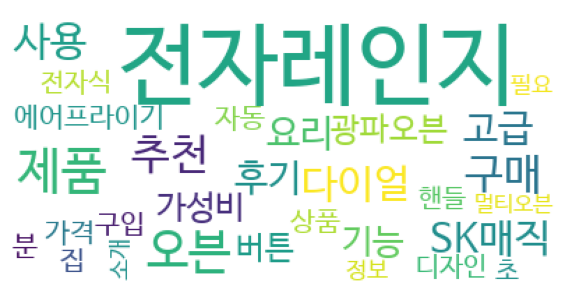

In [48]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(tm_wc)

### 2) 형용사 핵심어를 단어 구름으로 표시하기

In [57]:
from wordcloud import WordCloud
tm_wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')
tm_wc.generate_from_frequencies(tm_top_adj)

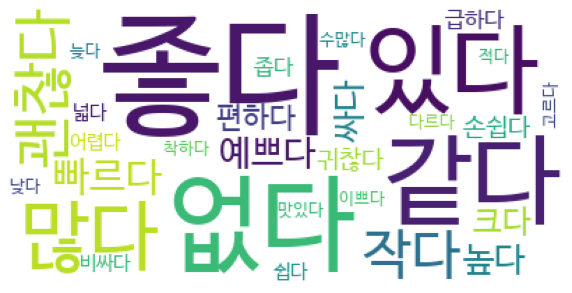

In [58]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(tm_wc)

### 3) 단어 구름 바탕 그림 변경하기

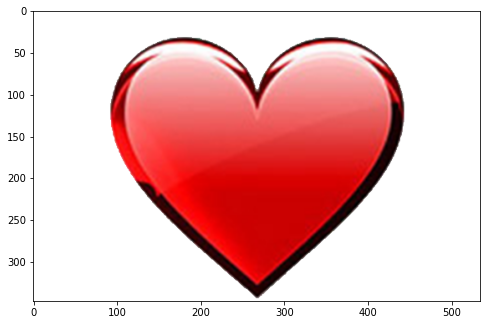

In [69]:
# 하트 그림파일 (heart.png) 같은 폴더에 미리 다운받아 놓을 것. 

from PIL import Image
import numpy as np
cloud_mask=np.array(Image.open('heart.png')) 
plt.figure(figsize=(8,8))
plt.imshow(cloud_mask,interpolation="bilinear")
plt.show()

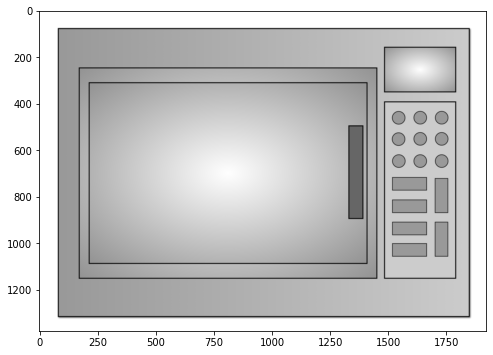

In [126]:
# 하트 그림파일 (heart.png) 같은 폴더에 미리 다운받아 놓을 것. 

from PIL import Image
import numpy as np
cloud_mask=np.array(Image.open('microwave-g313937a19_1920.png')) 
plt.figure(figsize=(8,8))
plt.imshow(cloud_mask,interpolation="bilinear")
plt.show()

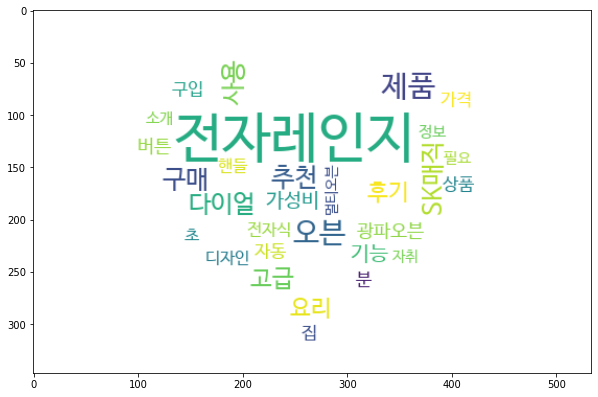

In [70]:
tm_wc = WordCloud(background_color="white", mask=cloud_mask, font_path='NanumBarunGothic.ttf')
tm_wc.generate_from_frequencies(tm_top_nouns)
plt.figure(figsize=(10,10))
plt.imshow(tm_wc,interpolation="bilinear")
plt.axis("on")
plt.show()

## 2.3. 단어빈도-역문서빈도(TF-IDF) 분석


블로그 내용에서 빈도가 높은 단어에 대해서 TF-IDF 값을 구하기 위해서 TfidfVectorizer 라이브러리를 import 한다. 그리고 추출한 50개의 명사가 블로그 내용에서 어떤 TF-IDF 값을 가지는지 배열 형태로 출력한다.

In [125]:
tm_top_nouns = list(tm_top_nouns.keys())
print(len(tm_top_nouns))

30


In [60]:
!pip install sklearn
import sklearn

### 1) 상위 핵심어에 대한 TF-IDF 분석

TF-IDF 값에 대해서 테이블 형태로 살펴보기위해 DataFrame을 이용하여 출력한다.

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


vect = CountVectorizer()
document_term_matrix = vect.fit_transform(tm_top_nouns)

tm_tfidv = TfidfVectorizer().fit(tm_top_nouns)
tm_tfidv.transform(tm_posts).toarray()

tm_30_tfidf=pd.DataFrame(tm_tfidv.transform(tm_posts).toarray(), columns=vect.get_feature_names())
tm_30_tfidf[100:110]

c:\users\smell\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,sk매직,가격,가성비,고급,광파오븐,구매,구입,기능,다이얼,디자인,...,자동,자취,전자레인지,전자식,정보,제품,추천,필요,핸들,후기
100,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.816497,0.0,0.000000,...,0.0,0.0,0.408248,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
101,0.392232,0.0,0.000000,0.0,0.000000,0.0,0.196116,0.000000,0.0,0.000000,...,0.0,0.0,0.784465,0.0,0.0,0.000000,0.000000,0.0,0.0,0.392232
102,0.485071,0.0,0.485071,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.727607,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
103,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
104,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.242536,...,0.0,0.0,0.970143,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
105,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
106,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
107,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.904534,0.0,0.0,0.301511,0.301511,0.0,0.0,0.000000
108,0.000000,0.0,0.000000,0.0,0.707107,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.707107,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
109,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [138]:
# tm_30_tfidf.to_csv('./data/skm_blog_tfidf30.csv', encoding='utf-8-sig') # csv 저장

# tfidf_xlsx = pd.ExcelWriter('./data/skm_blog_tfidf30.xlsx', engine='xlsxwriter') # xslx 파일로 저장 
# tm_30_tfidf.to_excel(tfidf_xlsx, sheet_name='Sheet1') 
# tfidf_xlsx.close()

### 2) 관심있는 단어를 직접 지정하여 TF-IDF 구하기

In [140]:
custom_vocab = ['sk매직', '가스레인지', '빌트인', '교체', '구매', '설치', '후드', '디자인', '가격', '하이브리드','인덕션', '가치', '사용', '추천', '에코']
print(custom_vocab)

['sk매직', '가스레인지', '빌트인', '교체', '구매', '설치', '후드', '디자인', '가격', '하이브리드', '인덕션', '가치', '사용', '추천', '에코']


In [119]:
custom_vocab = ["전자레인지", "제품", "구매","다이얼","사용","기능","가성비" ,"가격","구입","디자인","필요"]
print(custom_vocab)

['전자레인지', '제품', '구매', '다이얼', '사용', '기능', '가성비', '가격', '구입', '디자인', '필요']


In [69]:
custom_vocab = ["배송","가성비","디자인","색상","해동"]
print(custom_vocab)

['배송', '가성비', '디자인', '색상', '해동']


In [130]:
vect = CountVectorizer()
custom_term_matrix = vect.fit_transform(custom_vocab)

custom_tm_tfidv = TfidfVectorizer().fit(custom_vocab)
custom_tm_tfidv.transform(tm_posts).toarray()

custom_tm_tfidf=pd.DataFrame(custom_tm_tfidv.transform(tm_posts).toarray(), columns=vect.get_feature_names())
custom_tm_tfidf[0:1100]

c:\users\smell\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,가성비,디자인,배송,색상,해동
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
562,0.0,0.0,0.0,0.0,0.0
563,0.0,0.0,0.0,0.0,0.0
564,0.0,0.0,0.0,0.0,0.0
565,0.0,0.0,0.0,0.0,0.0


In [131]:
# custom_tm_tfidf.to_csv('./data/skm_blog_tfidf_15.csv', encoding='utf-8-sig') # csv 저장
custom_tm_tfidf.to_csv('C:/Users/smell/OneDrive/바탕 화면/tool 모음/수업/2학기 수업/파이썬 텍스트 마이닝/skm_blog_tfidf_15.csv', encoding='utf-8-sig')
custom_tfidf_xlsx = pd.ExcelWriter('C:/Users/smell/OneDrive/바탕 화면/tool 모음/수업/2학기 수업/파이썬 텍스트 마이닝/skm_blog_tfidf_15.xlsx', engine='xlsxwriter') # xslx 파일로 저장 
custom_tm_tfidf.to_excel(custom_tfidf_xlsx, sheet_name='Sheet1') 
custom_tfidf_xlsx.close()